# Random Forest on Iris Flower 

In [29]:
#Import dataset from sklearn 
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [30]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [31]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [33]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [35]:
df_iris = pd.DataFrame(iris.data)
df_iris.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Append the target to the iris data

In [36]:
df_iris['target'] = iris.target
df_iris.head()

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
#split the data into feature(x) and target(y)
x = df_iris.drop(['target'], axis='columns')
y = df_iris.target

In [40]:
print(x)

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


In [41]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32


In [42]:
# Split the data to train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.2, random_state = 4)

In [43]:
len(x_train)

120

In [44]:
#Train the model
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
#Check the accuracy score
model.score(x_test,y_test)

0.9666666666666667

In [46]:
#accuracy score for 20 random trees
model =RandomForestClassifier(n_estimators=20)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9666666666666667

In [47]:
#accuracy score for 50 random trees
model =RandomForestClassifier(n_estimators=50)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9666666666666667

In [48]:
#check the prediction
y_pred =model.predict(x_test)
y_pred

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2])

In [49]:
#use confusion matrix to check predcition made
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[16,  0,  0],
       [ 0,  4,  1],
       [ 0,  0,  9]], dtype=int64)

Text(69.0, 0.5, 'Truth')

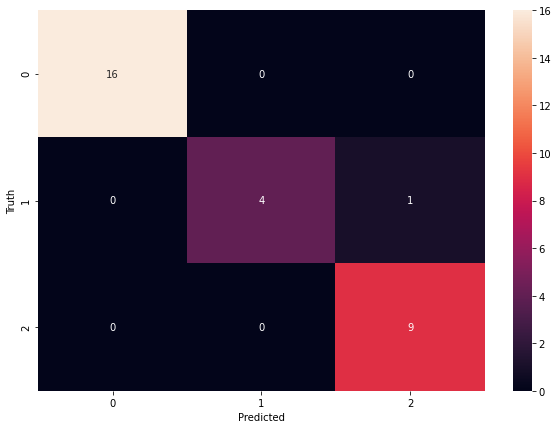

In [50]:
#Visualize better with heatmap
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')